In [72]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import roberts
from mpl_toolkits.mplot3d import Axes3D


In [57]:
fileId = '0001'

In [58]:
filepath = r'D:\Data\cs-8395-dl\assignment3\Training\img\img{}.nii.gz'.format(
    fileId)

In [5]:
img_nib = nib.load(filepath)

In [6]:
img_np =img_nib.get_data()

C:\Users\Reasat\Miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [7]:
img_np.shape

(512, 512, 147)

In [8]:
img_np.size

38535168

In [23]:
img_np.dtype

dtype('<i2')

In [14]:
img_np.max(), img_np.min(), img_np.mean(), np.median(img_np)

(2639, -1024, -489.53046007221246, -739.0)

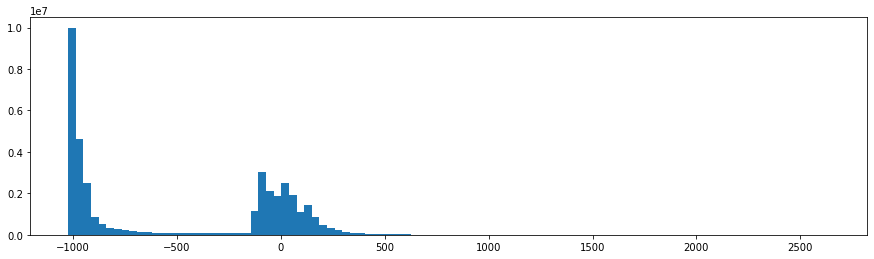

In [19]:
plt.figure(figsize=(15,4))
_=plt.hist(img_np.ravel(),bins=100)

In [20]:
img_np_norm = (img_np-img_np.min())/(img_np.max()-img_np.min())

In [21]:
img_np_norm.max(), img_np_norm.min(), img_np_norm.mean(), np.median(img_np_norm)

(1.0, 0.0, 0.14591033031061654, 0.07780507780507781)

In [24]:
img_np_norm_tr=img_np_norm.transpose((2,0,1))

In [59]:
filepath_label = r'D:\Data\cs-8395-dl\assignment3\Training\label\label{}.nii.gz'.format(fileId)
label_nib = nib.load(filepath_label)

In [26]:
label_np = label_nib.get_data()

C:\Users\Reasat\Miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.


In [29]:
label_np.shape

(512, 512, 147)

In [28]:
label_np.max(), label_np.min(), np.unique(label_np.ravel())

(13, 0, array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       dtype=uint8))

In [42]:
label_np_tr = label_np.transpose((2,0,1))
label_np_tr.shape

(147, 512, 512)

In [53]:
np.unique(label_np_tr_sp)

array([0, 6, 8, 9], dtype=uint8)

0


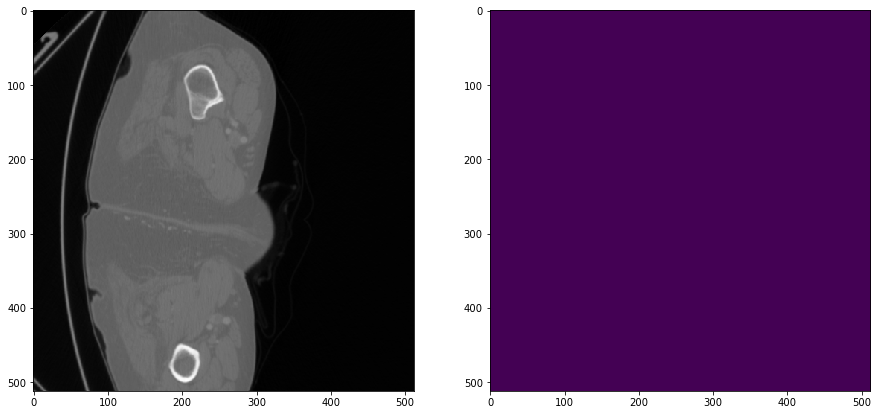

10


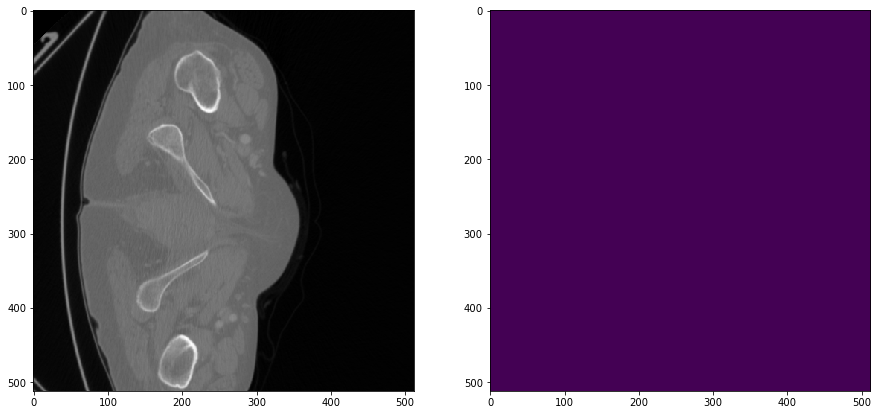

20


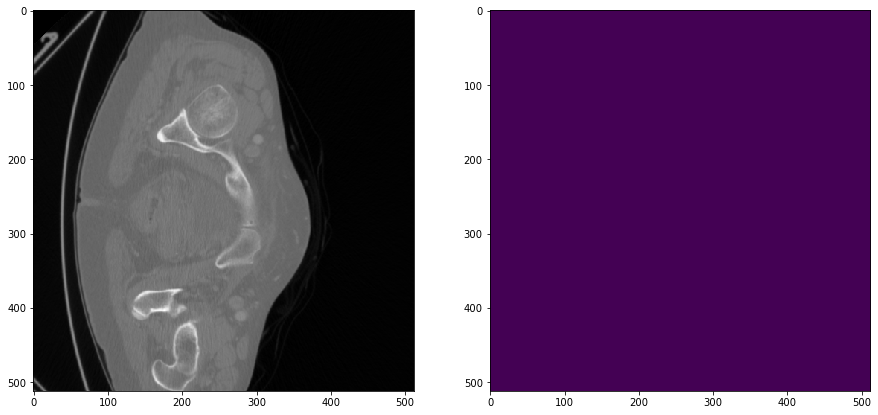

30


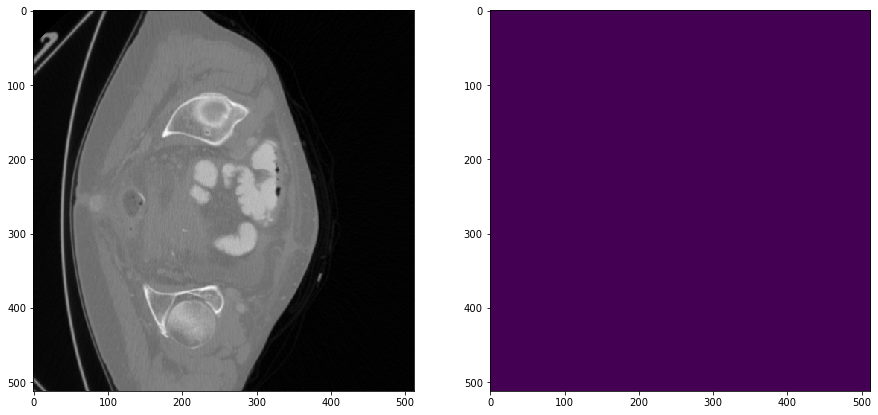

40


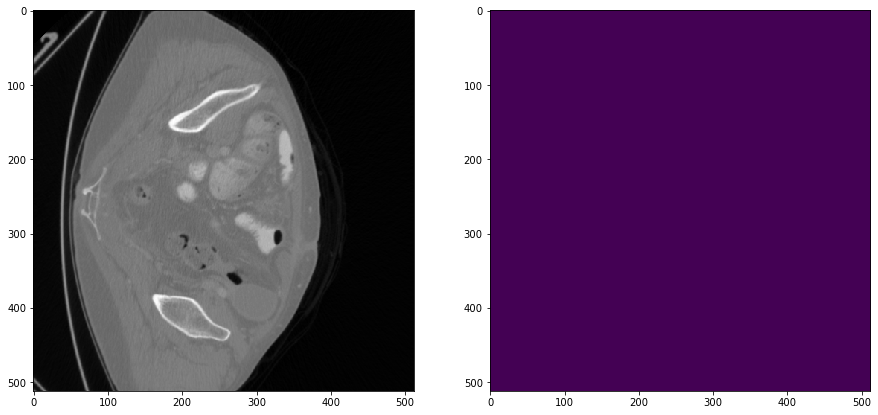

50


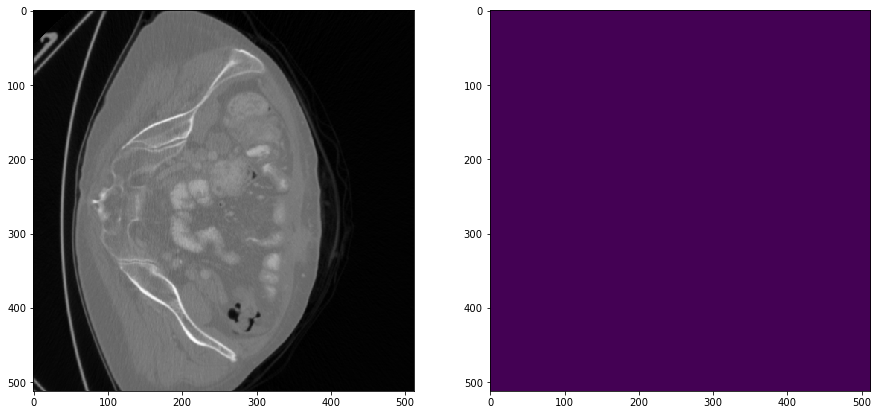

60


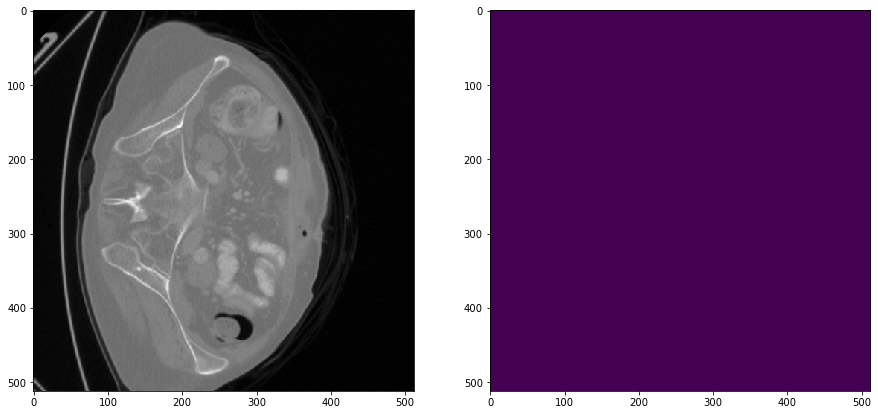

70


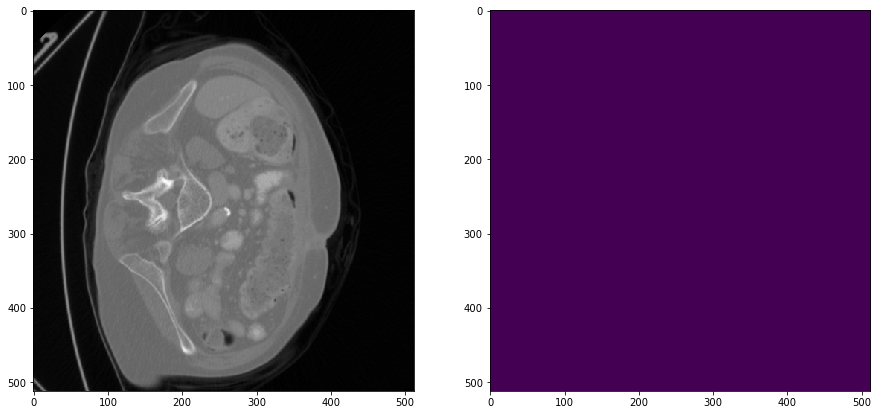

80


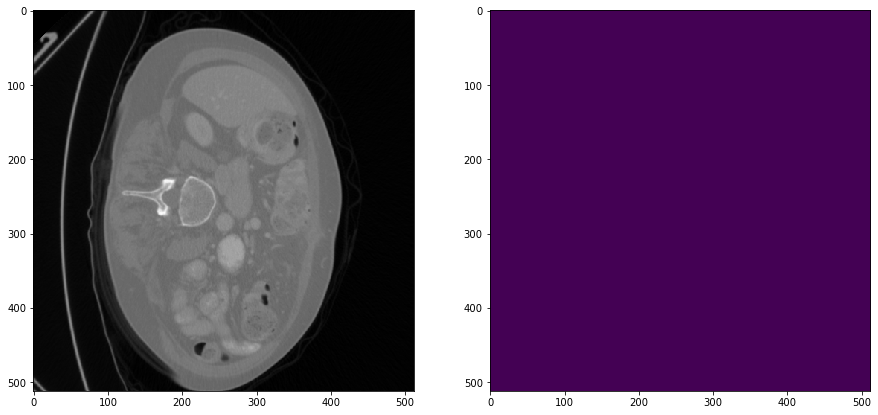

90


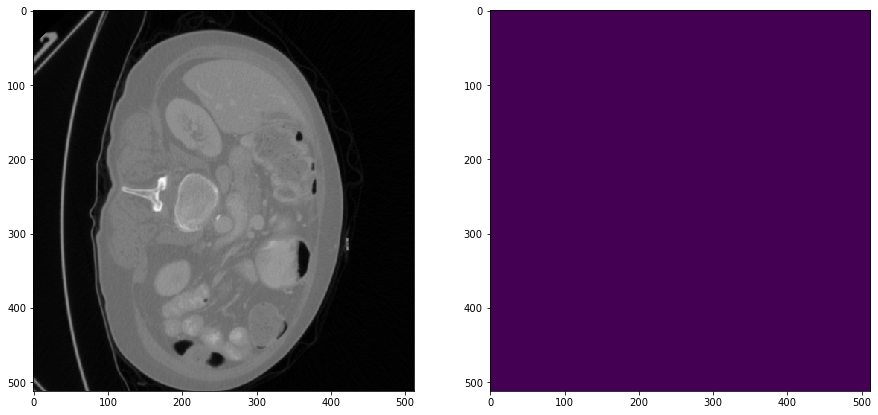

100


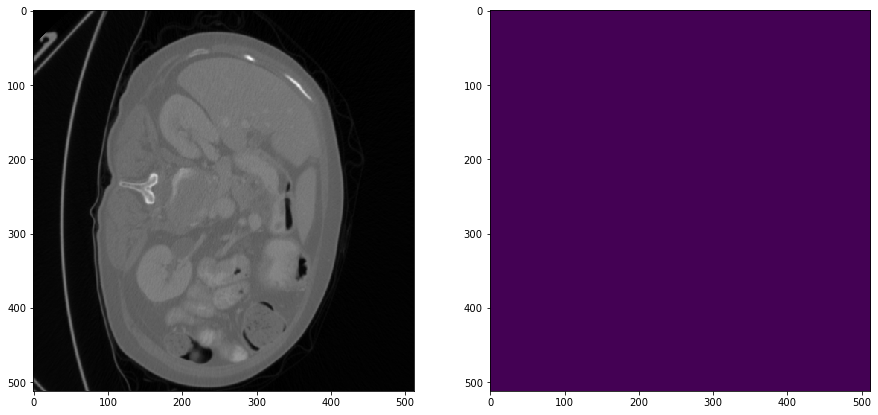

110


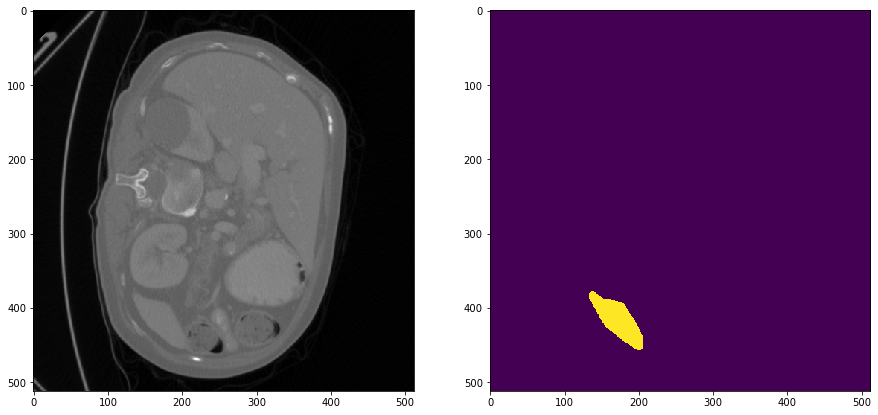

120


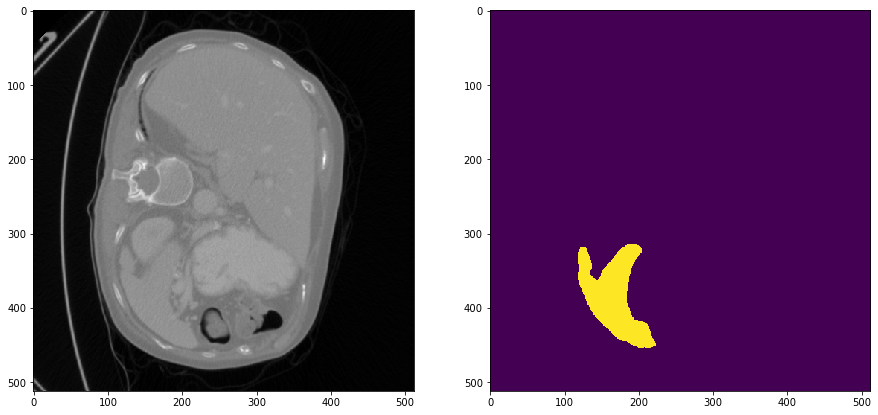

130


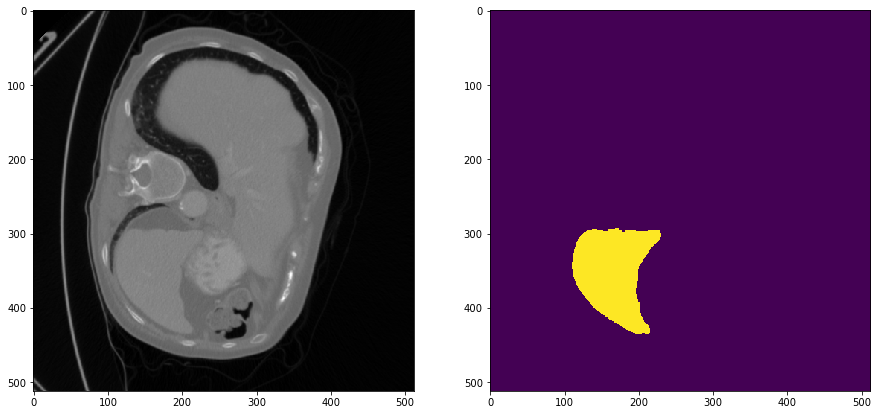

140


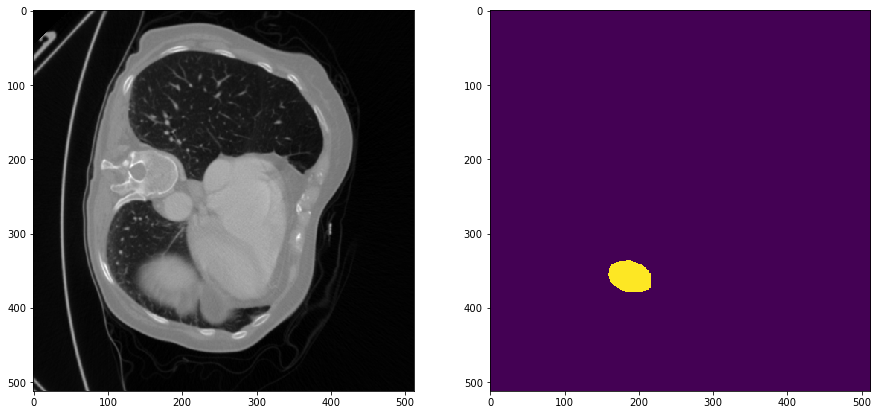

In [56]:
for ind in range(0,147,10):
    print(ind)
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(img_np_norm_tr[ind],cmap='gray')
    plt.subplot(1,2,2)
    label_np_tr_sp = label_np_tr[ind].copy()
    label_np_tr_sp[label_np_tr_sp!=1]=0
    plt.imshow(label_np_tr_sp)
    plt.show()

130


C:\Users\Reasat\Miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: No contour levels were found within the data range.
  


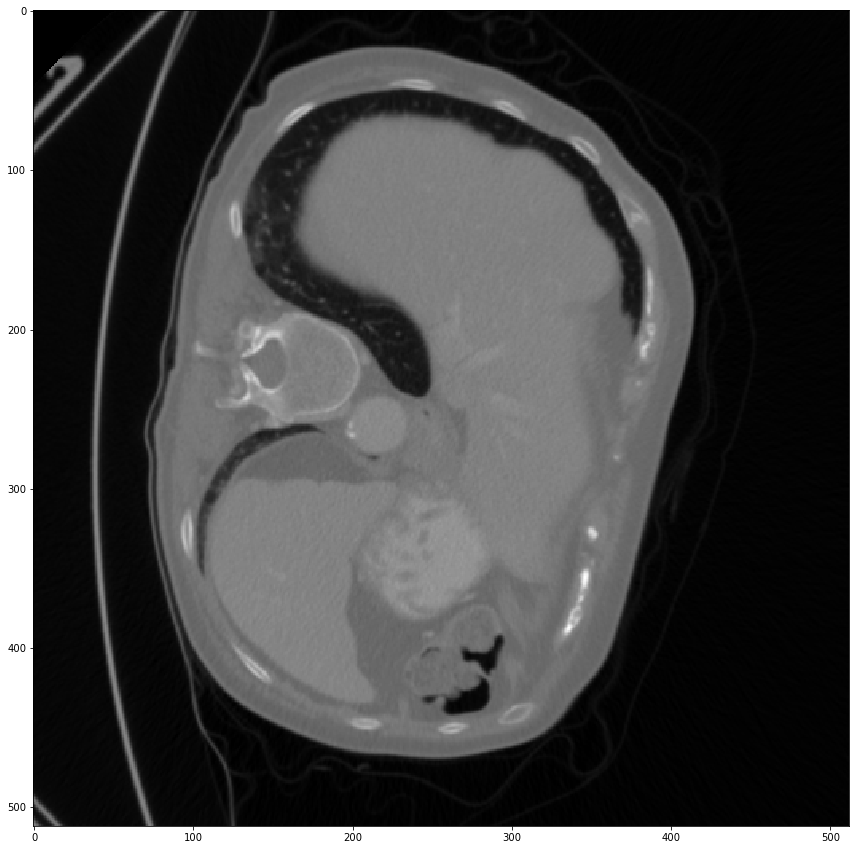

131


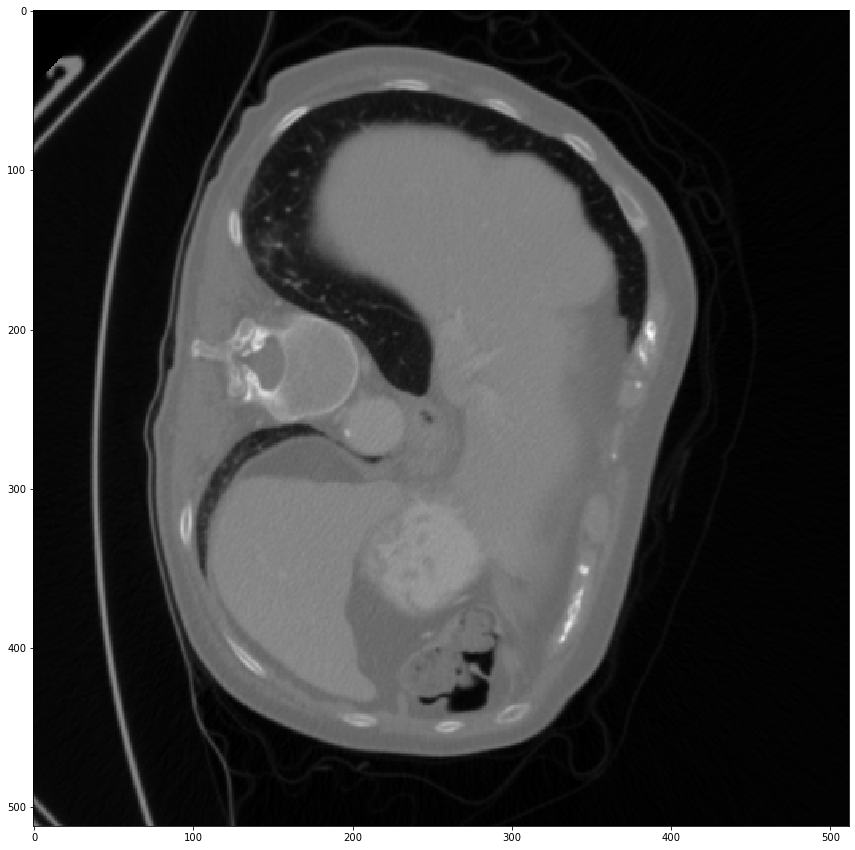

132


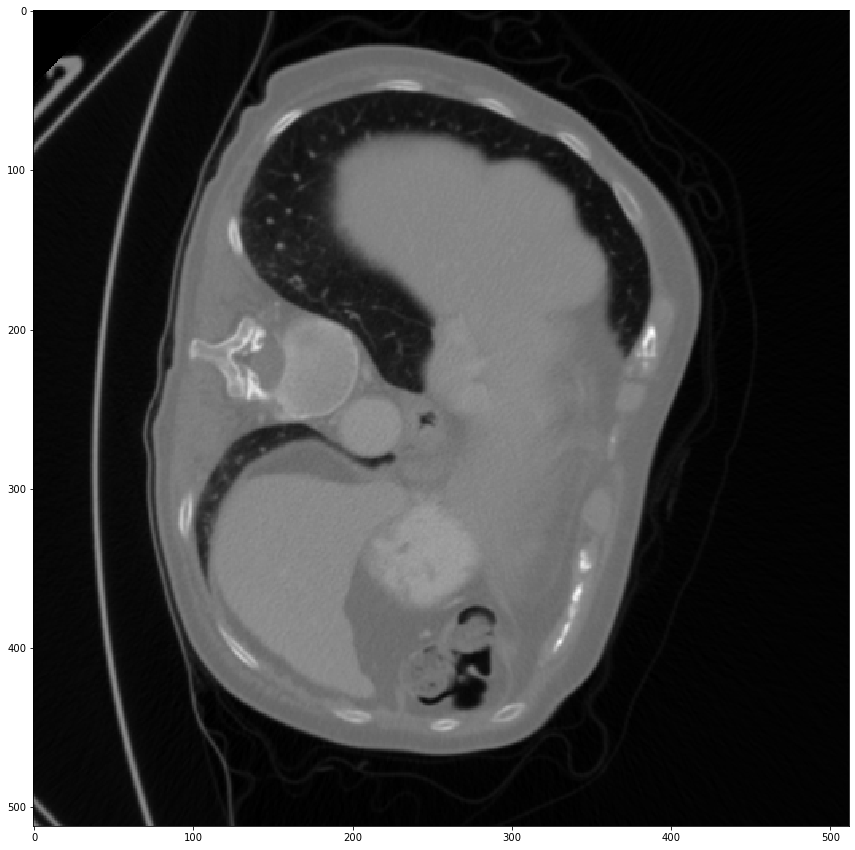

133


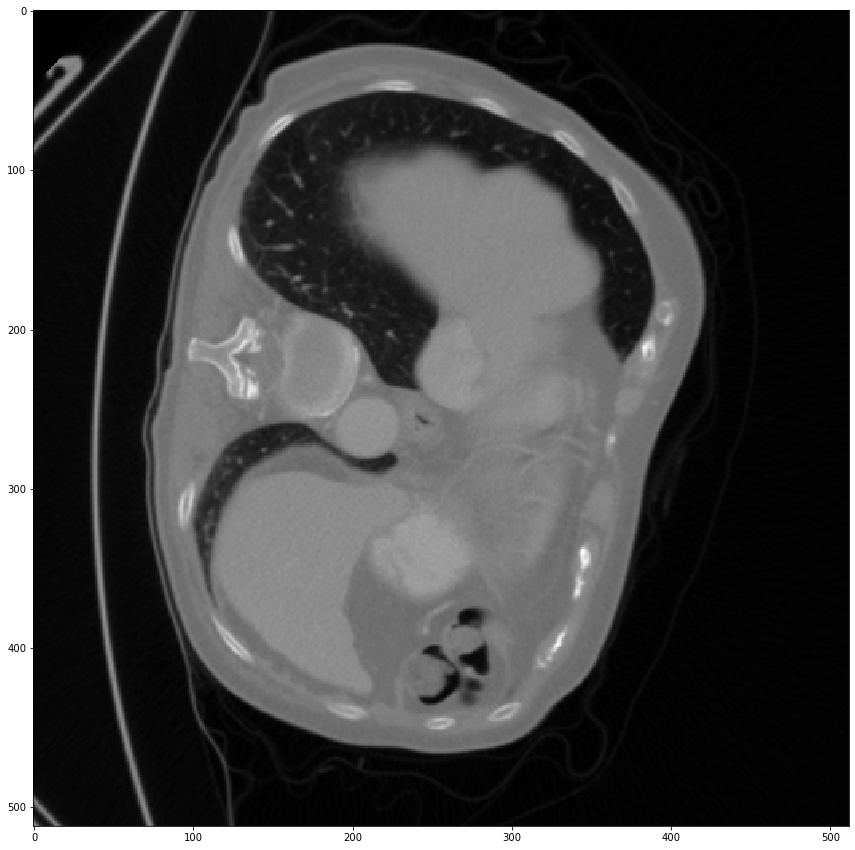

134


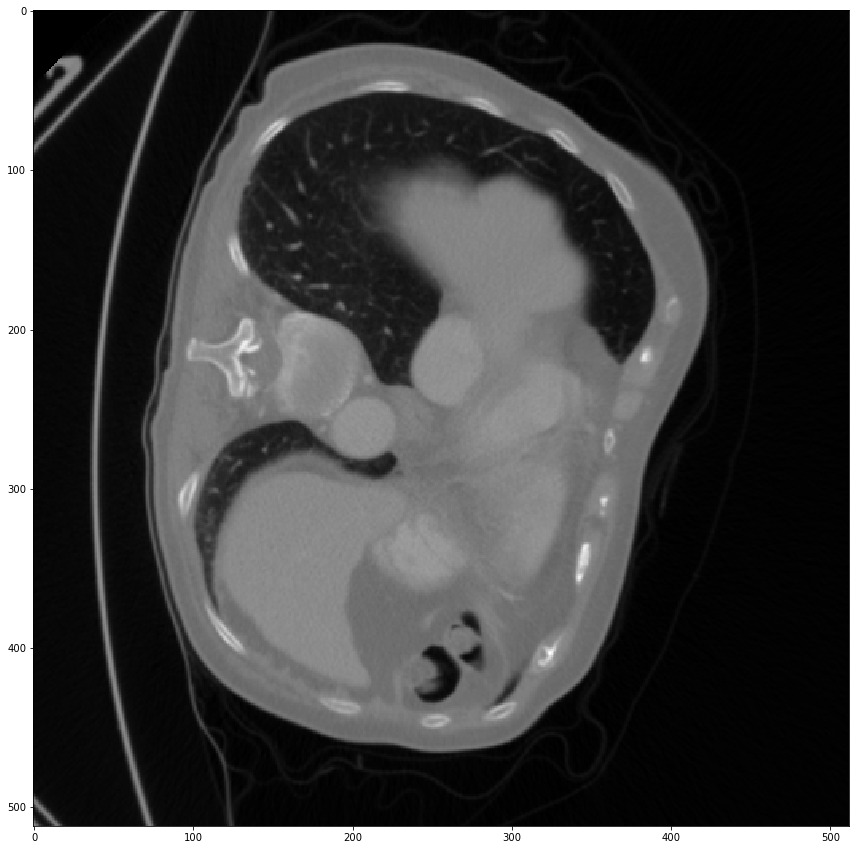

135


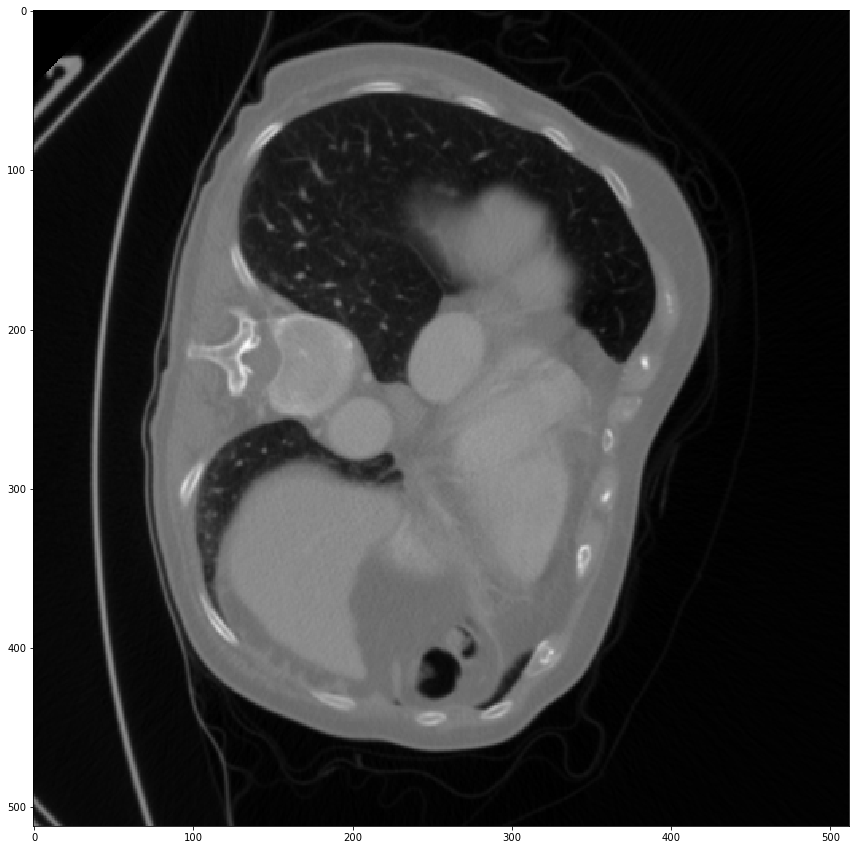

136


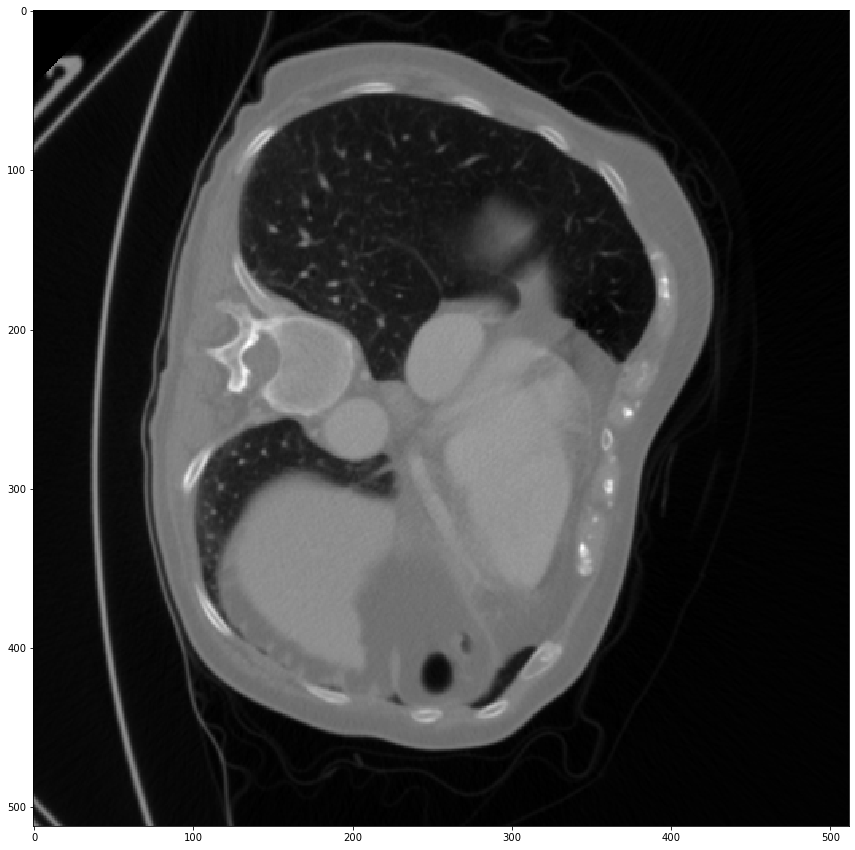

137


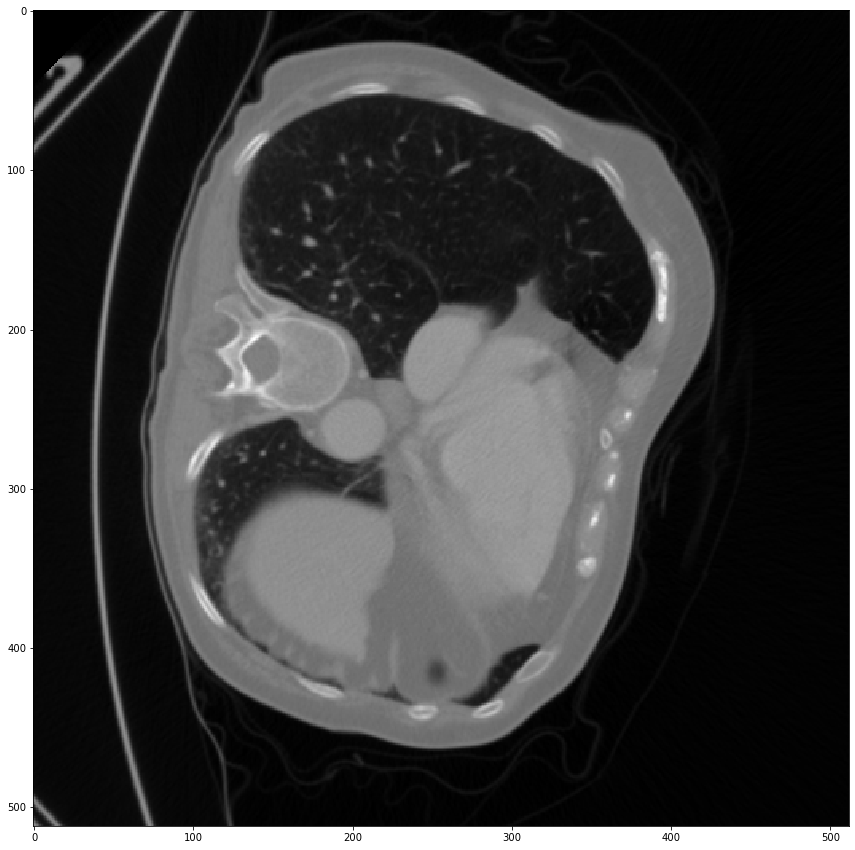

138


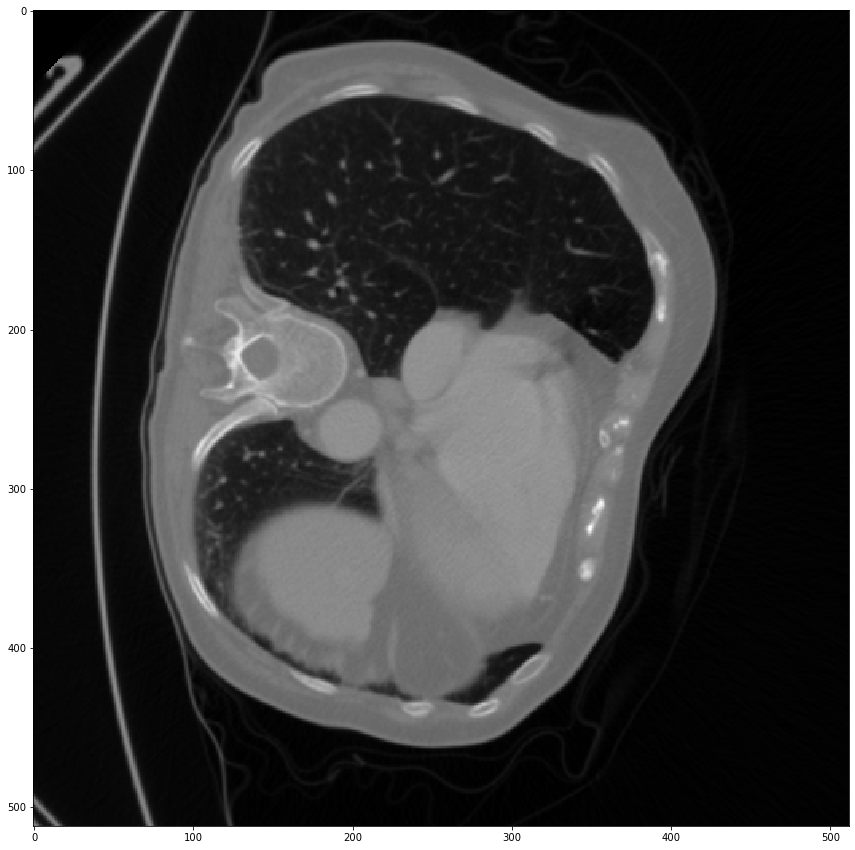

139


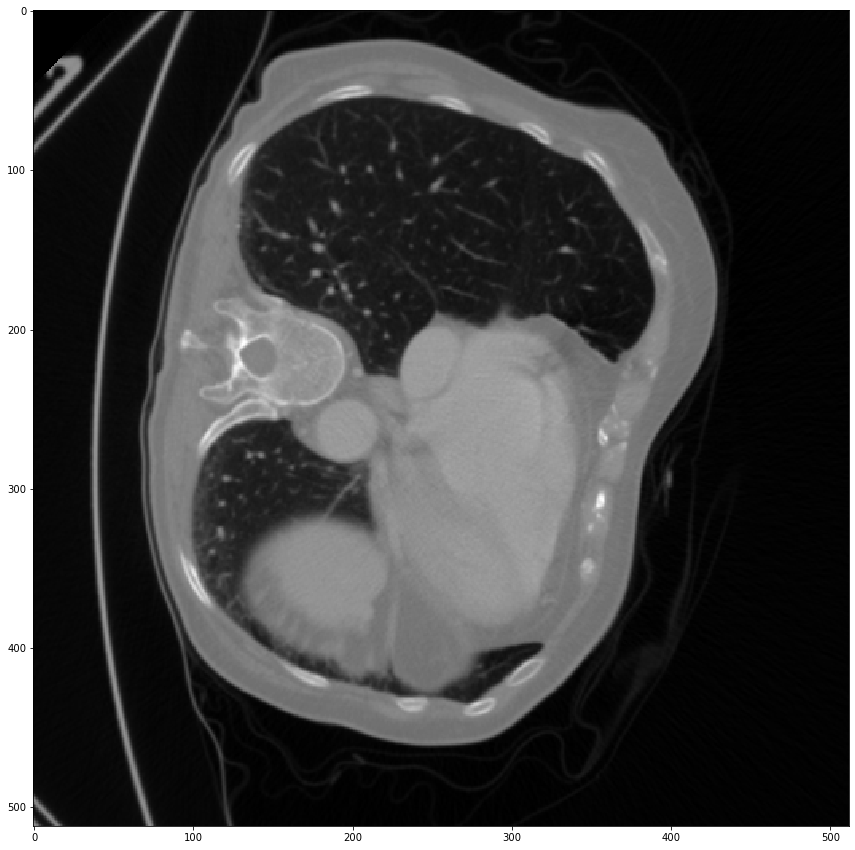

140


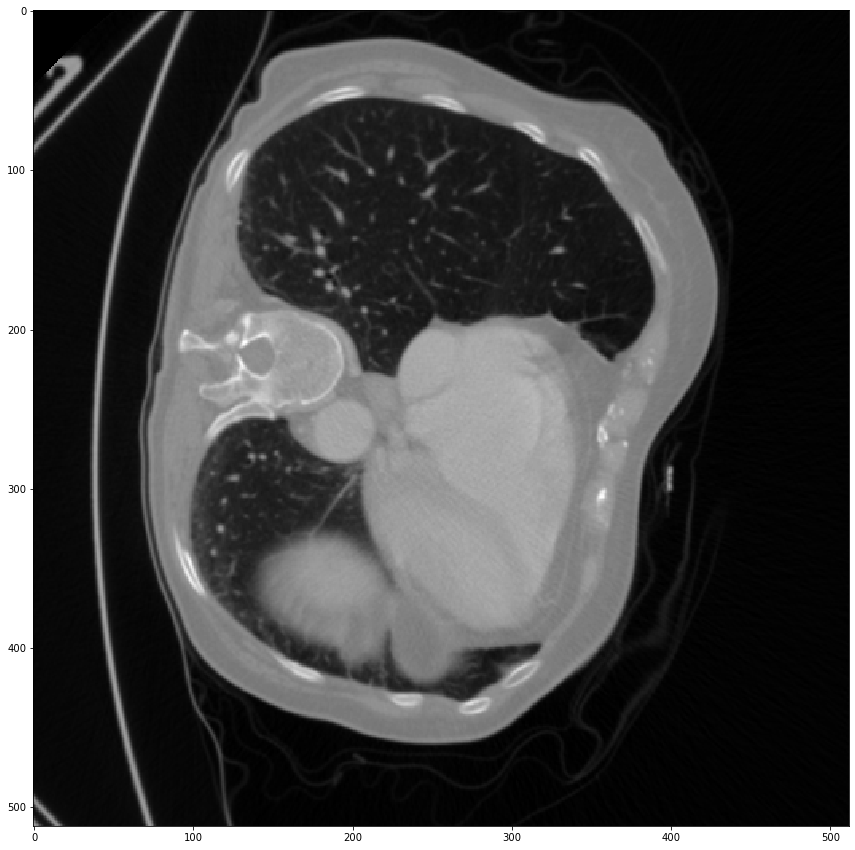

141


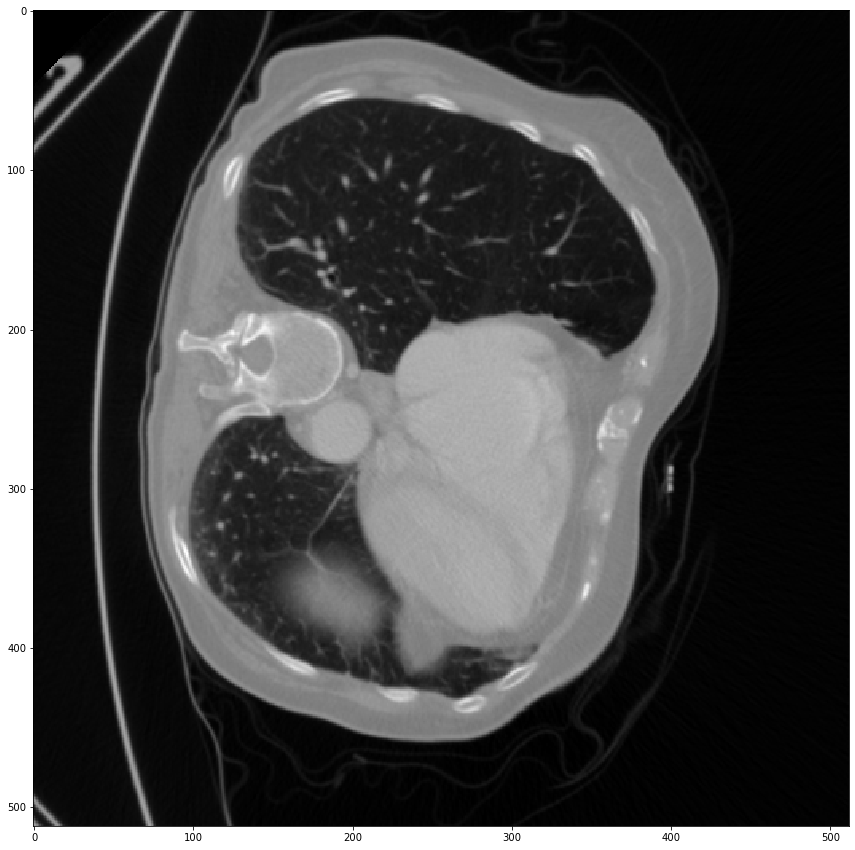

142


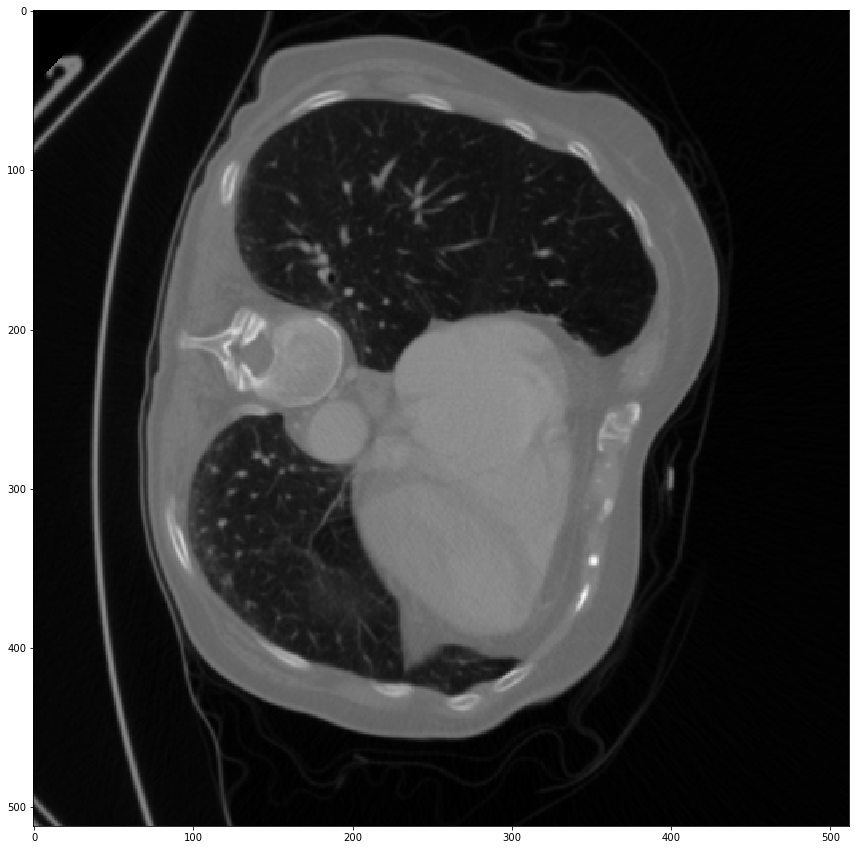

143


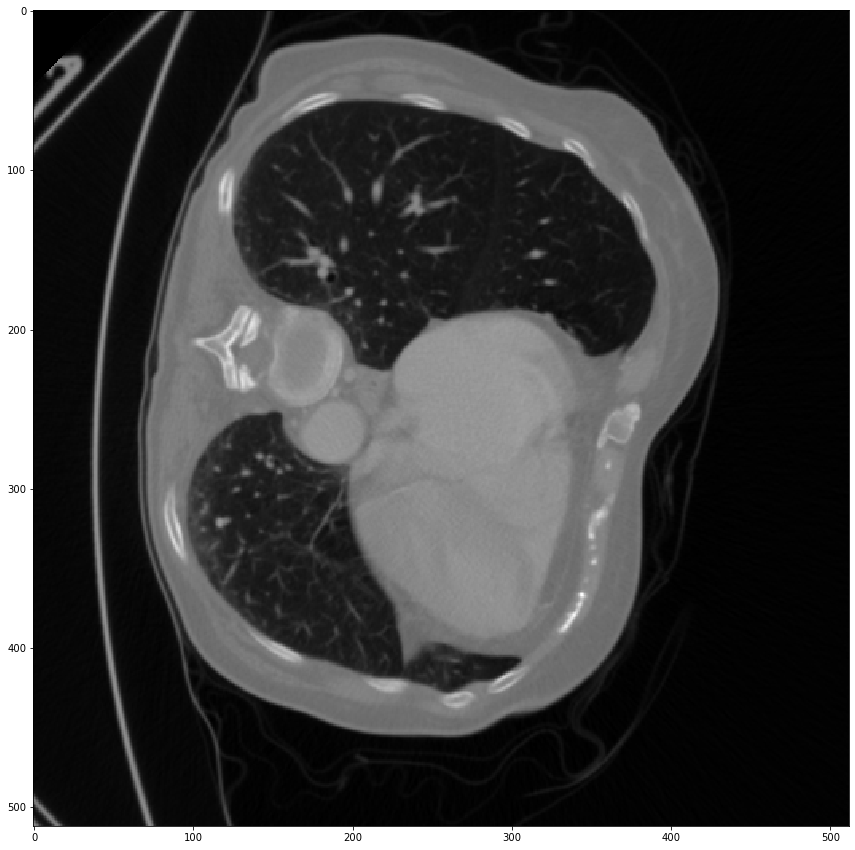

144


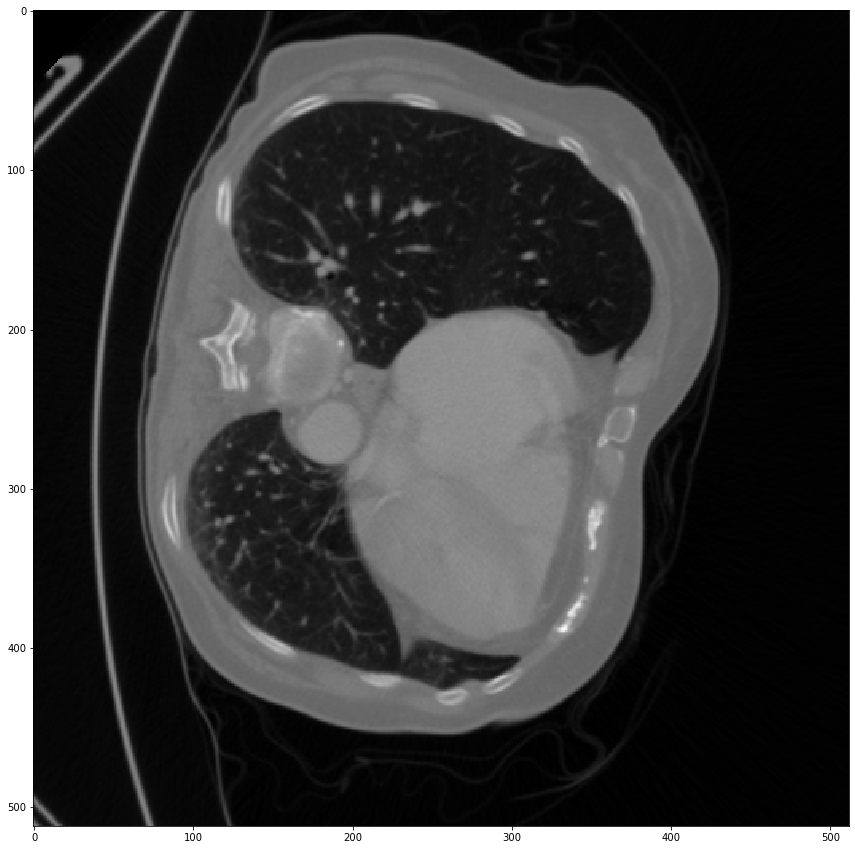

145


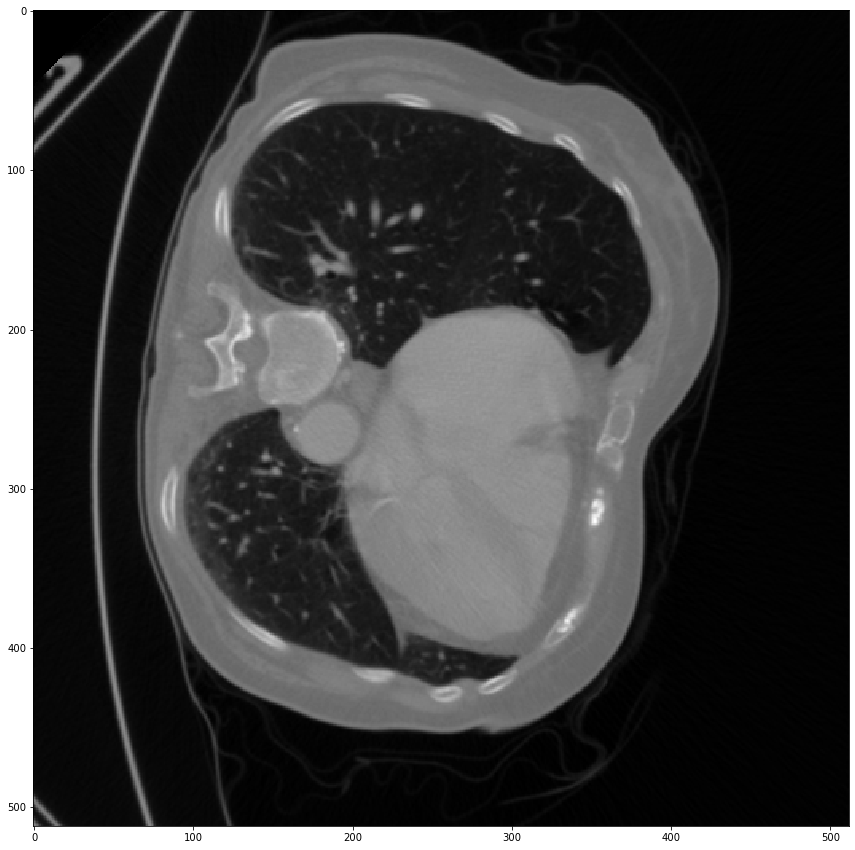

146


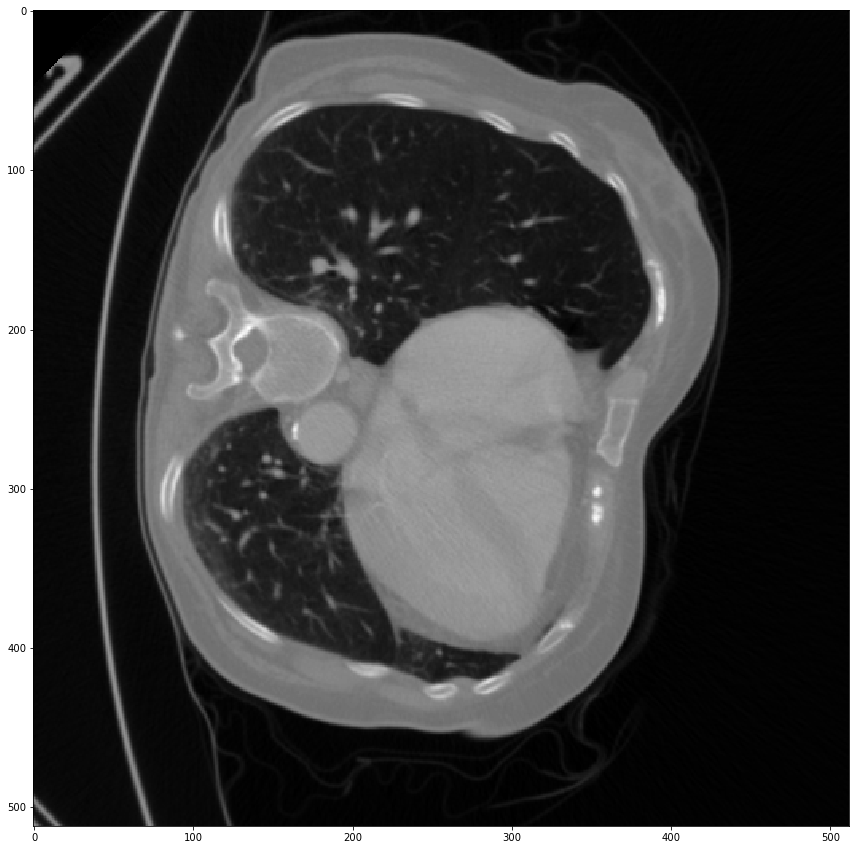

In [76]:
for ind in range(130,147,1):
    print(ind)
    plt.figure(figsize=(15,15))
    plt.imshow(img_np_norm_tr[ind],cmap='gray')
    label_np_tr_sp = label_np_tr[ind].copy()
    label_np_tr_sp[label_np_tr_sp!=2]=0
    label_np_tr_sp_ol = (roberts(label_np_tr_sp > label_np_tr_sp.max() / 2) * 255).astype(np.uint8)
    plt.contour(label_np_tr_sp_ol, colors='green', linewidths=1)
    plt.show()

In [71]:
spleen_ratio = (label_np_tr==1).sum()/label_np_tr.size
spleen_ratio

0.006038769572770514